<a href="https://colab.research.google.com/github/UtkarshHere/Brain-Tumour-Detection-/blob/main/Brain_Tumour_Detection_using_CNN_(_CAPSTONE_)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import numpy
from sklearn import metrics

In [ ]:
# Load the images directories
path = "/content/drive/MyDrive/brain_tumor_dataset"
image_paths = list(paths.list_images(path))

In [ ]:
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)

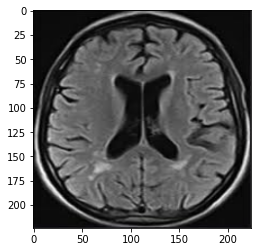

In [ ]:
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import numpy as np

images = np.array(images) / 255.0
labels = np.array(labels)

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input

base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10

In [ ]:
history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size), steps_per_epoch= train_steps, validation_data = (test_X, test_Y), validation_steps= validation_steps, epochs= epochs)

<ipython-input-18-3ba642c9a82e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size), steps_per_epoch= train_steps, validation_data = (test_X, test_Y), validation_steps= validation_steps, epochs= epochs)


Epoch 1/10
28/28 [==============================] - 141s 5s/step - loss: 0.7421 - accuracy: 0.5890 - val_loss: 0.6427 - val_accuracy: 0.6154
Epoch 2/10
28/28 [==============================] - 127s 5s/step - loss: 0.6591 - accuracy: 0.6393 - val_loss: 0.6235 - val_accuracy: 0.6538
Epoch 3/10
28/28 [==============================] - 129s 5s/step - loss: 0.6250 - accuracy: 0.6712 - val_loss: 0.6078 - val_accuracy: 0.7308
Epoch 4/10
28/28 [==============================] - 129s 5s/step - loss: 0.6210 - accuracy: 0.6895 - val_loss: 0.5998 - val_accuracy: 0.6923
Epoch 5/10
28/28 [==============================] - 127s 5s/step - loss: 0.5669 - accuracy: 0.7443 - val_loss: 0.5744 - val_accuracy: 0.7308
Epoch 6/10
28/28 [==============================] - 131s 5s/step - loss: 0.5672 - accuracy: 0.7215 - val_loss: 0.5650 - val_accuracy: 0.6923
Epoch 7/10
28/28 [==============================] - 128s 5s/step - loss: 0.5515 - accuracy: 0.7397 - val_loss: 0.5447 - val_accuracy: 0.6923
Epoch 8/10
28

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

4/4 [==============================] - 16s 3s/step
              precision    recall  f1-score   support

          no       0.75      0.30      0.43        10
         yes       0.68      0.94      0.79        16

    accuracy                           0.69        26
   macro avg       0.72      0.62      0.61        26
weighted avg       0.71      0.69      0.65        26

[[ 3  7]
 [ 1 15]]


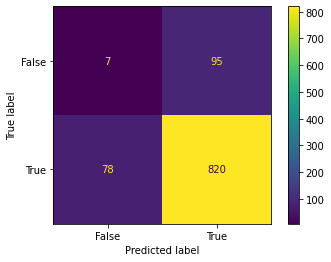

In [2]:
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.6923


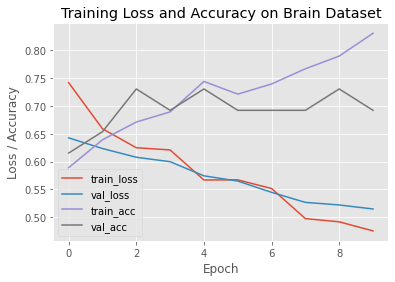

In [ ]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")